# Аналитический проект для прогнозирования оттока клиентов финтес-клуба «Культурист-датасаентист»

Содержание

Описание проекта

Шаг 1.Загрузка данных

1.1 Загрузка необходимых библиотек<br>
1.2 Загрузка данных<br>
1.3 Проверка данных на наличие дубликатов и пропусков.<br>

Шаг 2.Исследовательский анализ данных.

2.1 Изучение данных на предмет отсутствующих признаков, средние значения и стандартные отклонения.<br>
2.2 Изучение среднего значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.<br>
2.3 Построение столбчатых гистограмм и распределений признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).<br>
2.4 Построение матрицы корреляций.<br>

Шаг 3.Построение модели прогнозирования оттока клиентов.

3.1 Разбиение даннх на обучающую и валидационную выборку.<br>
3.2 Обучение модели на train-выборке логистической регрессией.<br>
3.3 Обучение модели на train-выборке случайным лесом.<br>
3.4 Оценка и сравнение метрик accuracy, precision и recall для обеих моделей на валидационной выборке.<br>

Шаг 4.Кластеризация клиентов.

4.1 Стандартизация данных<br>
4.2 Построение матрицы расстояний<br>
4.3 Обучение модели кластеризации на основании алгоритма K-Means<br>
4.4 Изучение средних значений признаков для кластеров<br>
4.5 Построение распределений признаков для кластеров.<br>
4.6 Подсчёт доли оттока для кластеров.<br>

Шаг 5.Выводы

5.1 Основные выводы<br>
5.2 Рекомендации для работы с клиентами.<br>


# Описание проекта.

Сети фитнес-центров «Культурист-датасаентист» нужно разработать стратегию взаимодействия с клиентами.
Основная проблема фитнес-клубов и других сервисов — отток клиентов. 
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
В распоряжении имеется клиентская база с анкетами, задача - провести анализ и подготовить план по удержанию клиентов.

А именно:

спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

## Загрузка данных

### Загрузка необходимых библиотек

In [41]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import numpy as np

### Загрузим данные

In [42]:
# загрузим данные в файл gym_client
gym_client=pd.read_csv('/datasets/gym_churn.csv')
gym_client

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [43]:
gym_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Вывод: датафрейм содержит 4000 записей, пустых записей нет, типы данных соответствуют содержимому колонок, названия колонок не имеют пробелов, но некоторые начинаются с большой буквы, приведём названия к общепринятому типу.

In [44]:
gym_client.columns=gym_client.columns.str.lower()

### Проверка данных на наличие дубликатов и пропусков

In [45]:
# проверим данные на наличие дубликатов и пропусков
# проверим на дубликаты и пропуски
display(gym_client.duplicated().sum())
display(gym_client.isnull().sum())

0

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Вывод: дубликатов и пропусков данных не обнаружено.

## Исследовательский анализ данных.

### Изучение данных на предмет отсутствующих признаков, средние значения и стандартные отклонения.

Ответим на основные вопросы, касающиеся EDA.

какой размер датасета?

какие в него входят признаки? 

каков тип признаков? 

какова доля пропущенных значений? 


Из предыдущего пункта ясен размер датасета - 4000 записей о клиентах.

Рассмотрим описание признаков:
    Данные клиента за предыдущий до проверки факта оттока месяц:
'gender' — пол;
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
'Phone' — наличие контактного телефона;
'Age' — возраст;
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
'Group_visits' — факт посещения групповых занятий;
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [46]:
gym_client.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Рассмотрим признаки и распределим их по типу:

    Категориальные:<br>
'gender' — пол;<br>
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;<br>
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);<br>
'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);<br>
'Age' — возраст; <br>
'Phone' — наличие контактного телефона;<br>
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<br>
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);<br>
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);<br>
'Group_visits' — факт посещения групповых занятий;<br>
    
   Числовые:<br>

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).<br>
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;<br>
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;<br>
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.<br>


In [47]:
# построим таблицу , характеризующую наборы значений в колонках
gym_client.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Вывод: из построеной таблицы можно сделать следующие выводы:

распределение в колонке `gender` приблизительно одинаковое (т. е. женщин и мужчин примерно поровну), 

среднее значение и прочие показатели в колонке `near_lacation` говорят о том, что более 80% клиентов проживает или работает в районе, где находится фитнес клуб, 

чуть меньше половины клиентов работают в компаниях - партнёрах, около трети клиентов использовали промо-код от знакомого при оплате первого абонемента, 

практически у всех клиентов есть номер телефона (что полезно для информирования об акциях, что в свою очередь является одним из способов удерживания клиентов), 

как минимум у половины клиентов оформлен абонимент на 1 месяц занятий, групповые занятия посещают меньше половины (порядка 40% клиентов), 

средний возраст клиентов составляет около 30 лет, 

среднее значение суммарной выручки для каждого клиента несущественно отличается от медианного значения, однако отклонение говорит о наличии выбросов, 

у большей части рассматриваемых клиентов(более 50%, срок до окончания абонимента составляет 1 месяц, что несомненно требует быстрых решений по вопросу оттока, вполне вероятно, что по окончании срока действия абонимента клиент не будет продлевать его.

Более половины клиентов с клубом на протяжении 3-х месяцев и более. 

Средняя частота посещений в неделю 1 - 2 раза, приблизительно такая же  а средняя частота посещений за предыдущий месяц, и факт оттока в текущем месяце (1 - наличие оттока, о - отсутствие), составляет чуть больше четверти записей, этот показатель мы будем исследовать и примем за целевую переменную.

У данных разные по величине стандартные отклонения, однако при построении модели Логистической регресии стандартизировать данные не нужно.

### Изучение среднего значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

Разделим клиентов на тех, кто ушел и тех кто остался и сравним средние значения.

In [48]:
gym_client.groupby(['churn']).agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Вывод: для тех клиентов, которые не захотели оставаться в клубом, почти все средние показатели меньше, кроме пола и наличия номера телефона, это можно учесть при выборе значений векторов для целевой переменной и не учитывать эти показатели при использовании алгоритма машинного обучения. Также есть показатели, значительно отличающиеся у двух групп, например такие как лайфтам и срок до окончания действия абонимента, уже сейчас можно предположить, что они влияют на отток.

### Построение столбчатых гистограмм и распределений признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [49]:
# создадим таблицу с катгориальными признаками, гистограммы которых нужно получить
# оставим в таблице колонки с категориальными значениями
gym_churn_category=gym_client.drop (columns = ['gender', 'phone','churn','avg_additional_charges_total','lifetime','avg_class_frequency_total' ,'avg_class_frequency_total','avg_class_frequency_current_month'])
gym_churn_category.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,month_to_end_contract
0,1,1,1,6,1,29,5.0
1,1,0,0,12,1,31,12.0
2,1,1,0,1,0,28,1.0
3,1,1,1,12,1,33,12.0
4,1,1,1,1,0,26,1.0


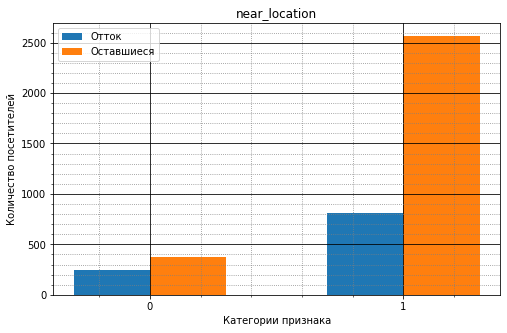

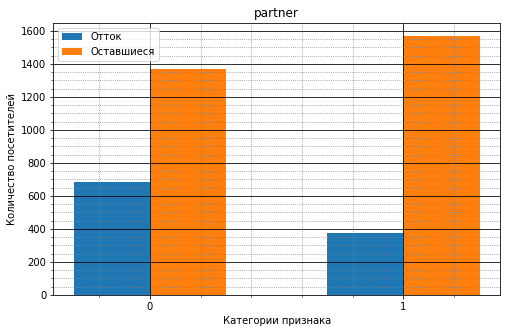

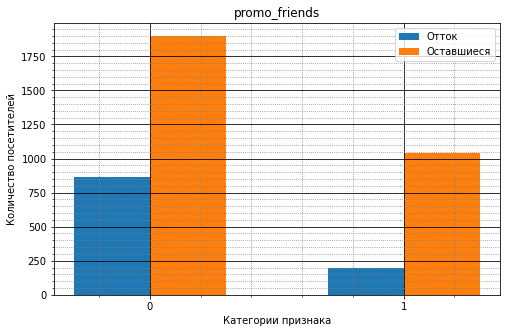

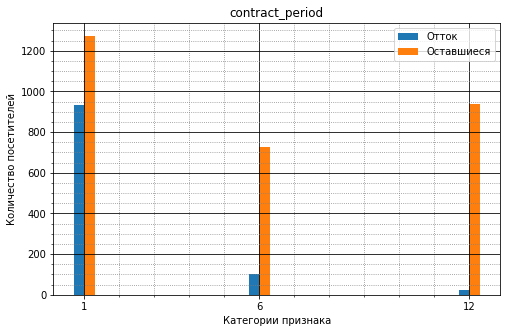

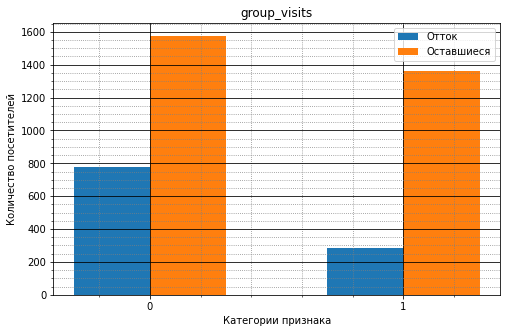

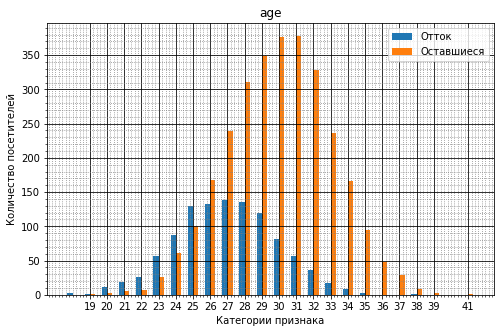

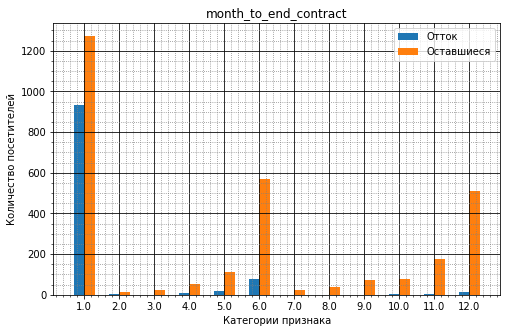

In [50]:
# построим гистограммы для категориальных признаков
for colum_name in gym_churn_category.columns:
    bar_width = 0.3
    plt.figure(figsize=(8,5))
    churn = gym_client.query('churn == 1').groupby(colum_name)['churn'].count().reset_index()
    no_churn = gym_client.query('churn == 0').groupby(colum_name)['churn'].count().reset_index()
    
    plt.bar(churn[colum_name],churn['churn'], bar_width, label='Отток')
    plt.bar(no_churn[colum_name] + bar_width,no_churn['churn'], bar_width, label='Оставшиеся')
    
   
    plt.legend()
    plt.title(colum_name)
    plt.grid(which='major',color = 'k')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.ylabel('Количество посетителей')
    plt.xlabel('Категории признака')
    plt.xticks(no_churn[colum_name] + bar_width / 2, no_churn[colum_name])
    plt.show;

Вывод: 

Из живущих рядом не покидает клуб большая часть клиентов. 

Чаще покидают клуб те, кто работает не в компанииях-партнёрах, чем те, что в них работает. 

Из тех клиентов, кто посещает клуб не в рамках акции "приведи друга" оттока больше. 

Клиенты, абонемент которых имеет срок 1 месяц покидают клуб чаще владельцев других абонементов. 

Клиенты, непосещающие групповые занятия уходят чаще посещающих.

Возрастная категория клиентов , наиболее часто поподающих в отток от 19 до 35 лет, пик оттока приходится на возраст 26-28 лет.

Клиенты, у которых до окончания абонемента остался 1 месяц покидают клуб чаще остальных.



Для количественных признаков построим графики распределения, проверим на выбросы.

In [51]:
# создадим таблицу с количественными признаками, распределение которых нужно получить
# оставим в таблице колонки с категориальными значениями
gym_churn_number=gym_client[['avg_additional_charges_total','lifetime','avg_class_frequency_total' ,'avg_class_frequency_current_month']]
gym_churn_number.head()

,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,14.227470,3,0.020398,0.000000
1,113.202938,7,1.922936,1.910244
2,129.448479,2,1.859098,1.736502
3,62.669863,2,3.205633,3.357215
4,198.362265,3,1.113884,1.120078


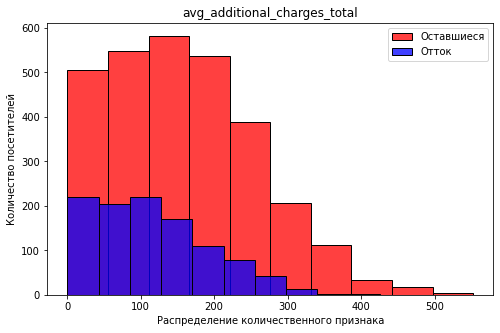

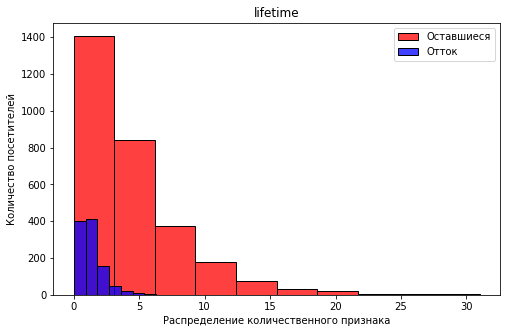

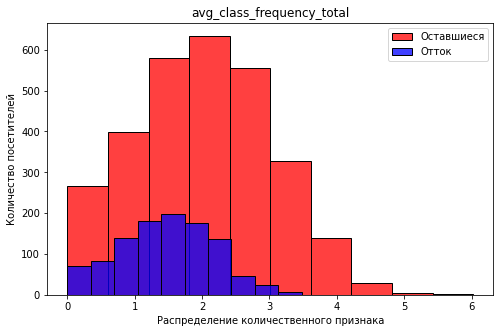

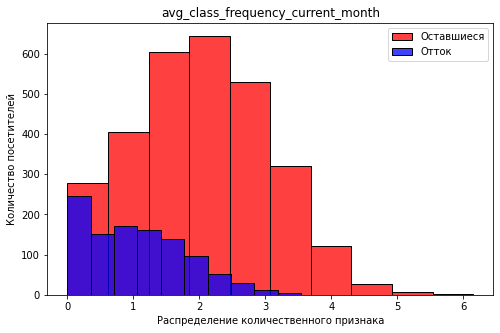

In [52]:
# построим гистограммы распределения для количественных признаков
for colum_name in gym_churn_number.columns:
    plt.figure(figsize=(8,5))
    churn = gym_client.query('churn == 1')
    no_churn = gym_client.query('churn == 0')    
    sns.histplot(no_churn[colum_name], bins=10, color='r', label="Оставшиеся")
    sns.histplot(churn[colum_name], bins=10, color='b',label='Отток')
       
    plt.legend()
    plt.title(colum_name)
    plt.ylabel('Количество посетителей')
    plt.xlabel('Распределение количественного признака')
    #plt.xticks(no_churn[colum_name] + bar_width / 2, no_churn[colum_name])
    plt.show;

Вывод:

Отток клиентов, оставивиших меньше средств велик сравнительно с клиентами оставивишими больше средств.

Чем меньше лайфтайм, тем выше вероятность оттока.

Наиболее часто в отток уходят клиента, которые посещают клуб в среднем 1-2 раза в неделю.

Последний гриафик, показывающий расределение в зависимости от количества посещений в неделю за последний месяц, не противоречит предыдущему предположению, а дополняет его, показывая наибольший отток также среди клиентовЮ не посетивщих клуб 0 раз в неделю за последний месяц, то есть не посещавших вовсе.




### Построение матрицы корреляций.

Рассчитаем матрицу корреляций и построим heatmap.

<function matplotlib.pyplot.show(close=None, block=None)>

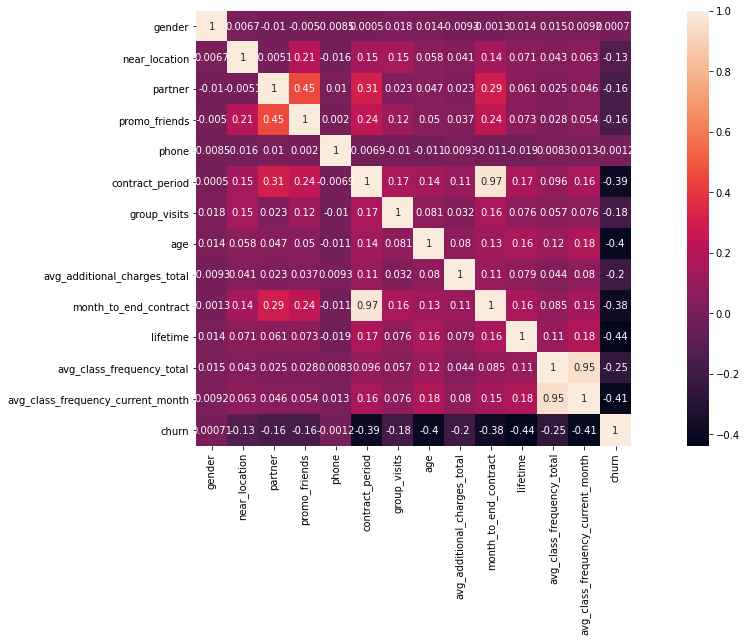

In [53]:
cm_gym_client = gym_client.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cm_gym_client, annot=True, square=True)
plt.show

Вывод: наиболее высокие коэффициенты корреляции получаются между периодом действия абонемента и сроком до его окончания, что вполне очевидно, также между средним количеством посещений в месяц и в неделю, что тоже вполне закономерно. 

Из наиболее высоких корреляция можем также предположить наличие зависимости между тем работает ли клиент в компании-партнёре и посетил ли он клуб в рамках акции "приведи друга". Нет смысла строить scatterplot т.к. обе колонки содержат бинарные значение. И график будет представлять собой четыре точки на координатной плоскости. 

Из отрицательных коэффициентов заслуживают внимания зависимость между отскоком и сроком действия абонемента, отскоком и возрастом, отскоком и месяцем до конца действия абонемента, отскоком и лайфтаймом, отскоком и средним количеством посещений в месяц. Т. е. матрица корреляции подтверждает некоторые предположения, сделанные после построения графиков распределения.

Остальные коэффициенты составляют меньше 0,4 и можно предположить отсутствие зависимостей.

In [54]:
gym_client.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

   Выдвинем предварительные гипотезы:
    
   - наиболее ценными для модели могут быть  исходя из корреляций следующие признаки: срок действия абонемента,  возраст, месяц до конца действия абонемента, лайфтайм  и среднее количество посещений в месяц.
    
   - перед построением ML некоторые колонки можно убрать, например пол и наличие номера телефона, т. к. из предварительного анализа мы предположили отсутствие взаимосвязи между этими признаками и целевой переменной. Также можно убрать колонки , корреляция между которыми слишком велика, это практически одни и те же сведения, а именно:
    
        срок абонемента и срок действия до окончания абонемента, уберём колонку со сроком до окончания, т. к. её корреляция с          целевой переменной меньше. 
        
        среднее количество посещений внеделю за последний месяц и среднее количество посещений в неделю за весь период, уберём        колонку со средним количеством посещений в неделю за весь период, т. к. её корреляция в целевлй переменной сравнительно меньше.

## Построение модели прогнозирования оттока клиентов.

### Разбиение даннх на обучающую и валидационную выборку.

Перед разбиением модели на обучающую и валидационную выборку преобразуем имеющуюся таблицу, удалим некоторые колонки, стандартизация данных не требуется, т. к. мы не будем применять линейную регресиию. В таблице имеются некоторые категориальные признаки, попробуем преобразовать их с помощью функции pandas.get_dummies().

In [55]:
gym_client_ml=gym_client.drop(columns = ['gender','phone','month_to_end_contract','avg_class_frequency_total'])

In [56]:
#сохраним датафрейм с учётом преобразования признаков и распечатайте размер и первые 5 строк
gym_client_ml = pd.get_dummies(gym_client_ml)
display(gym_client_ml.shape)
display(gym_client_ml.head())

(4000, 10)

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.227470,3,0.000000,0
1,1,0,0,12,1,31,113.202938,7,1.910244,0
2,1,1,0,1,0,28,129.448479,2,1.736502,0
3,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,0,26,198.362265,3,1.120078,0


In [57]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_client_ml.drop('churn', axis=1)
y = gym_client_ml['churn']

In [58]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### Обучение модели на train-выборке логистической регрессией.

In [59]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
) 

In [60]:
    model=LogisticRegression(random_state=0, solver='liblinear')
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    # бинарный прогноз
    acc = accuracy_score(y_test, prediction)
    precision = precision_score (y_test, prediction)
    recall = recall_score (y_test, prediction)
    print('Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f}'.format(acc,precision,recall))


Accuracy: 0.90 Precision: 0.79 Recall: 0.79


### Обучение модели на train-выборке случайным лесом.

In [61]:
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [62]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [63]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:',
)

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.75


### Оценка и сравнение метрик accuracy, precision и recall для обеих моделей на валидационной выборке.

После использования двух моделей обучения мы получили метрики классификации на основе значений прогнозного класса. После использования двух разных моделей бинарной классификации мы получили метрик:

accuracy (доля правиьных ответов), различающиеся у двух моделей на 0.01), 

precision (доля правильных ответов среди целевого класса, то есть "1"), эта доля одинаково в обоих моделях составляет 0,79 

racall ( сколько реальных объектов "1" класса удалось обнаружить с помощью модели), эта метрика показана более высоким значением у модели логистической регресси.

Помня о том, что в данном случае нас больше интересует не сам факт оттока клиентов, а возможность сохранить имеющихся клиентов, высокое значение метрики recall важнее, поэтому использование логистической регрессии представляется более оправданным.

## Кластеризация клиентов.

### Стандартизация данных

In [64]:
# перед построение дендрограммы избавимся от колонки `churn`, чтобы избежать излишней кластерилации
gym_client_no_churn=gym_client.drop(columns=['churn'])
# для построения дендрограммы будем использовать не весь датафрейм, а 50% от него.
gym_client_no_churn=gym_client_no_churn.sample(frac =.5, random_state = 0)

In [65]:
# стандартизируем данные
sc = StandardScaler()
x_sc =  sc.fit_transform(gym_client_no_churn)
# рассмотрим преобразованную таблицу
display(x_sc[:5])

array([[-1.02224741,  0.43967877,  1.03563452,  1.51848119,  0.35245864,
         1.60485531,  1.22730015, -0.06351139,  1.18518529,  1.83319905,
        -0.465958  ,  0.50496421,  0.54992787],
       [-1.02224741, -2.27438772, -0.96559161, -0.65855277,  0.35245864,
        -0.8175678 ,  1.22730015, -0.66838175, -1.05167673, -0.80105171,
        -0.98701811, -0.92228317, -1.0050982 ],
       [-1.02224741, -2.27438772,  1.03563452, -0.65855277,  0.35245864,
         0.28353361, -0.81479661,  0.23892379, -1.29879743,  0.15685766,
        -0.465958  , -1.98700564, -1.71521434],
       [ 0.97823676,  0.43967877, -0.96559161, -0.65855277,  0.35245864,
        -0.8175678 ,  1.22730015, -0.66838175, -0.08493189, -0.80105171,
        -0.98701811,  0.47733481,  0.07708145],
       [ 0.97823676, -2.27438772,  1.03563452, -0.65855277, -2.83721232,
         1.60485531, -0.81479661, -0.06351139, -0.61392975,  1.83319905,
        -0.72648805,  1.75015411,  1.56839134]])

### Построение матрицы расстояний

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

In [66]:
linked = linkage(x_sc, method = 'ward')

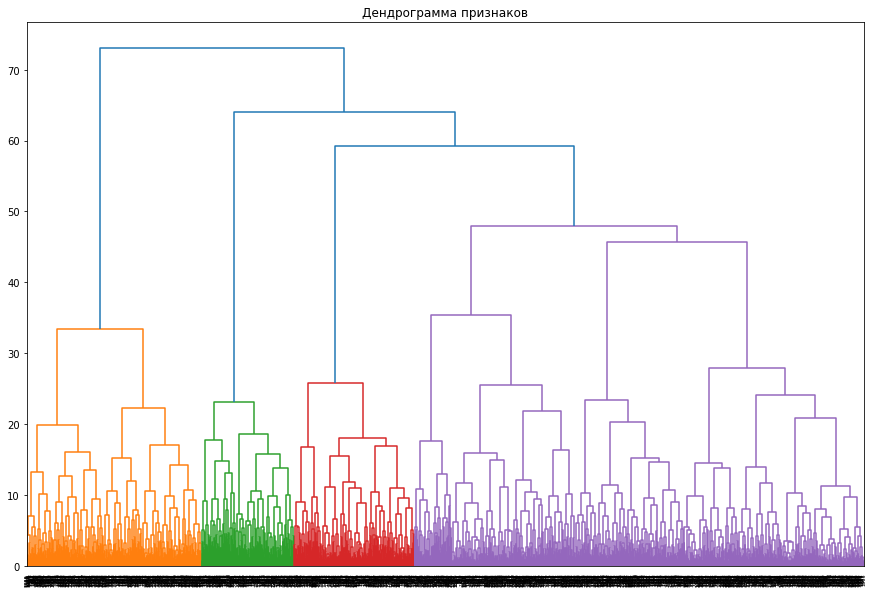

In [67]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма признаков')
plt.show()

Вывод: на основании полученного графика предположим, что можно выделить 4-ре кластера клиентов.

### Обучение модели кластеризации на основании алгоритма K-Means

In [76]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0) 
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(gym_client.drop(columns = ['churn']))

In [69]:
# сохраняем метки кластера в поле нашего датасета
gym_client['cluster_km'] = labels

In [70]:
# выводим статистику по средним значениям признаков по кластеру
display(gym_client.groupby(['cluster_km']).mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


Вывод: из предварительных данных, обратив внимание на колонку `churn` можно сделать вывод о наименьшем оттоке клиентов в группах. Анализируя данные остальных колонок можно охарактеризовать клиентов их этого кластера таким образом:

- в колонке `near_location` значения приблизительно одинаково, это значит, что место проживания несуществненно влияет на отток.

- в колонке `partner` наибольшее значение именно в той группе, отток из которой наименьший, это значит, что клиенты из-компаний партнёров остаются с клубом чаще остальных

- в колонке `promo_friends` значений несущественно отличаются, однако можно заменить, что в кластере с наименьшим оттоком это значение второе по величине, предположим, что приход в клуб в рамках акции "Приведи друга" не оказывает существенного влияния.;

- в колонке `phone` значение наиболее высокое в кластере с наименьшим оттоком;

- в колонке `contract_period` наибольшее значение в группе с наименьшим оттоком, чем дольше абонемент, тем меньше вероятность оттока;

- в колонке `group_visits` наблюдаются практически одинаковые значения, однако очевидно , что сравнительное редкое посещение групповых занятий способствует оттоку;

- в колонке `age` видим сравнительно одинаковый средний возраст клиентов, наименее подвержены оттоку клиенты старшего возраста;

- в колонке `avg_additional_charges_total` наибольшее значеине в кластере с наименьшим оттоком;

- по колонке `month_to_end_contract` можно сказать, что чем больше месяцев до окончания срока абонемента, тем меньше вероятность оттока;

- в колонке `lifetime` самые высокие значения там, где отток наименьший
 
 
- среднее количество посещений в неделю за весь период и за последний месяц  составляют в средним 2 раза в неделю для кластеров с наименьшим оттоком.
 
 



### Построение распределений признаков для кластеров.

Построим распределение признаков для кластеров.

In [71]:
# создадим таблицу с катгориальными признаками, гистограммы которых нужно получить
# оставим в таблице колонки с категориальными значениями
gym_churn_category_clust=gym_client.drop (columns = ['gender', 'phone','avg_additional_charges_total','lifetime','avg_class_frequency_total' ,'avg_class_frequency_total','avg_class_frequency_current_month','cluster_km','churn'])
gym_churn_category_clust.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,month_to_end_contract
0,1,1,1,6,1,29,5.0
1,1,0,0,12,1,31,12.0
2,1,1,0,1,0,28,1.0
3,1,1,1,12,1,33,12.0
4,1,1,1,1,0,26,1.0


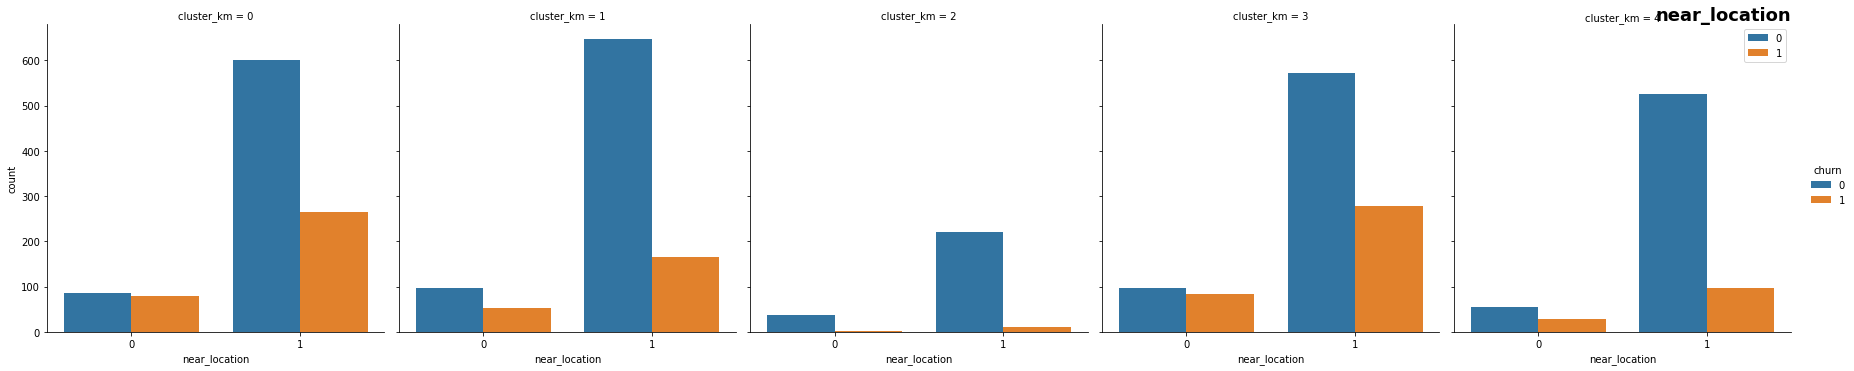

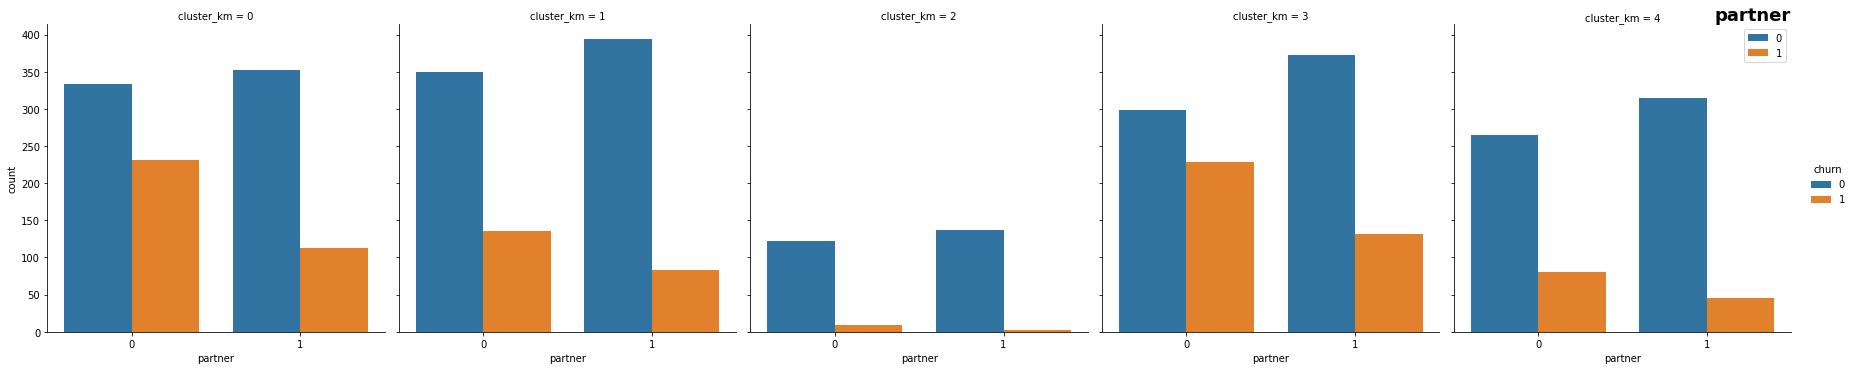

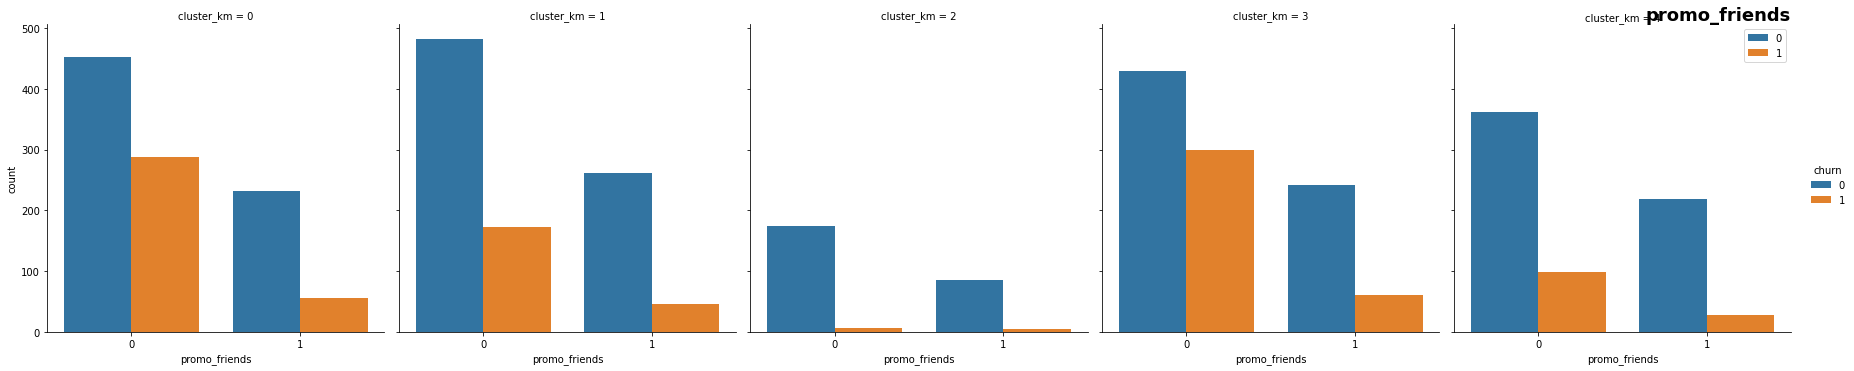

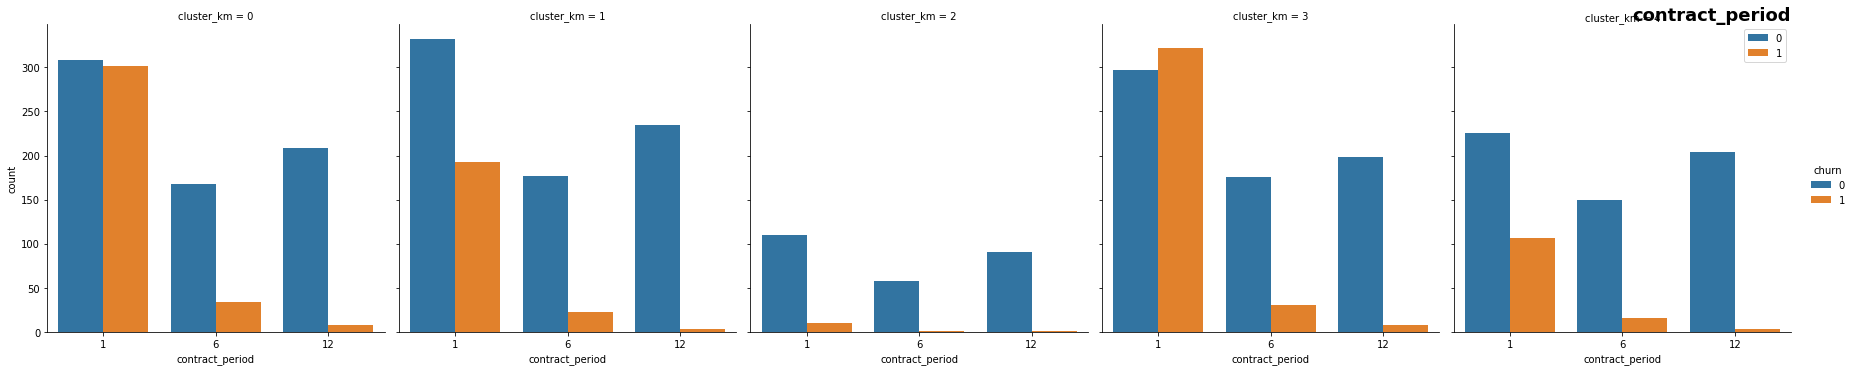

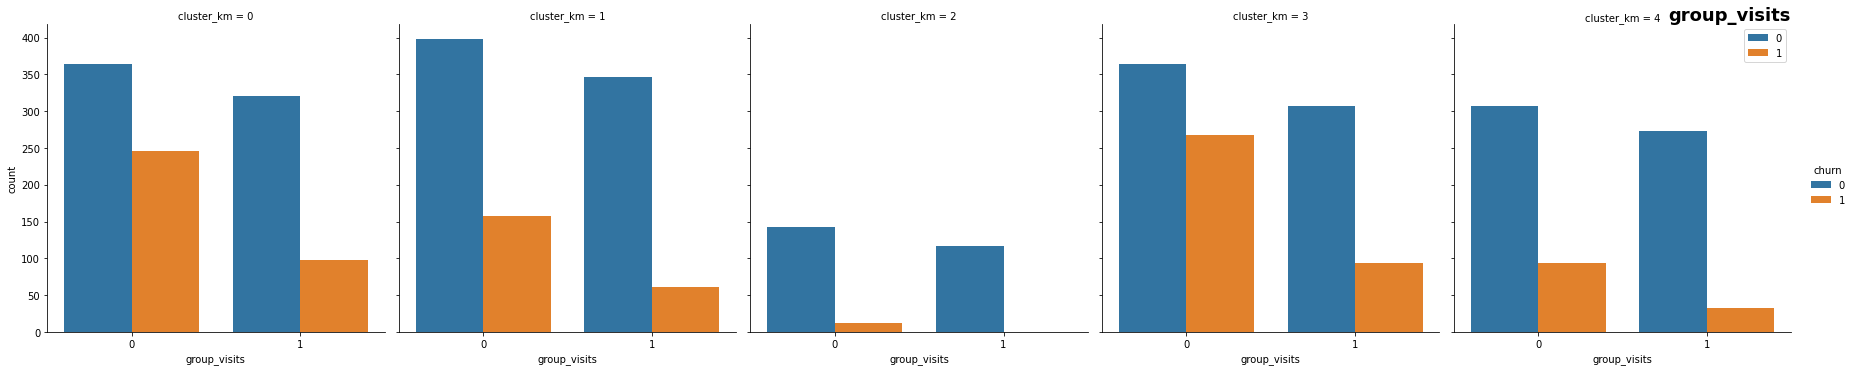

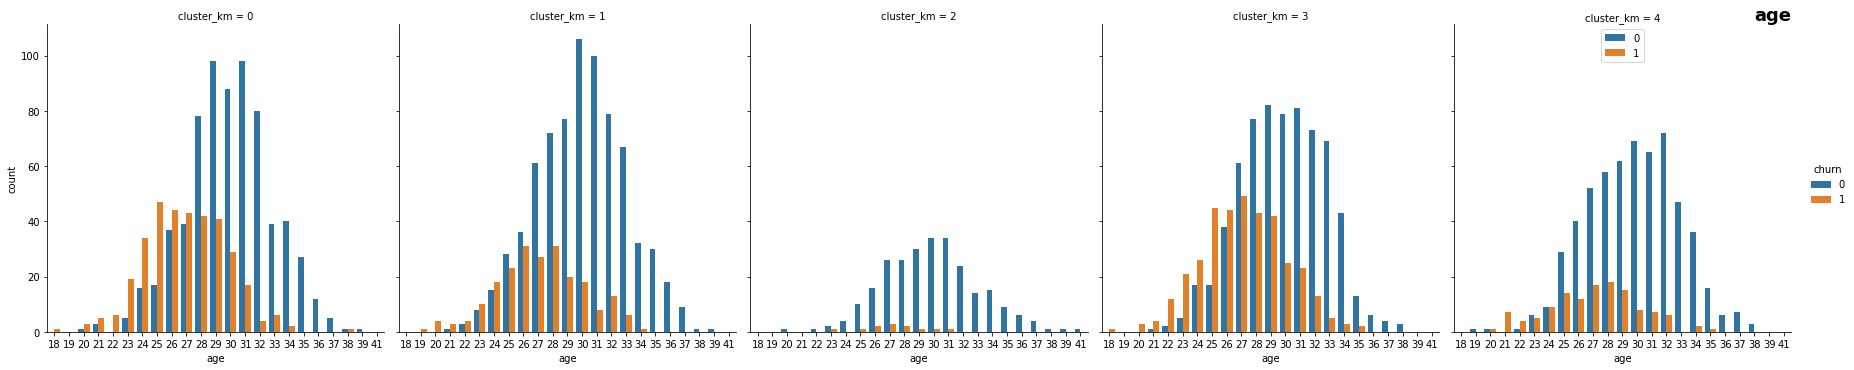

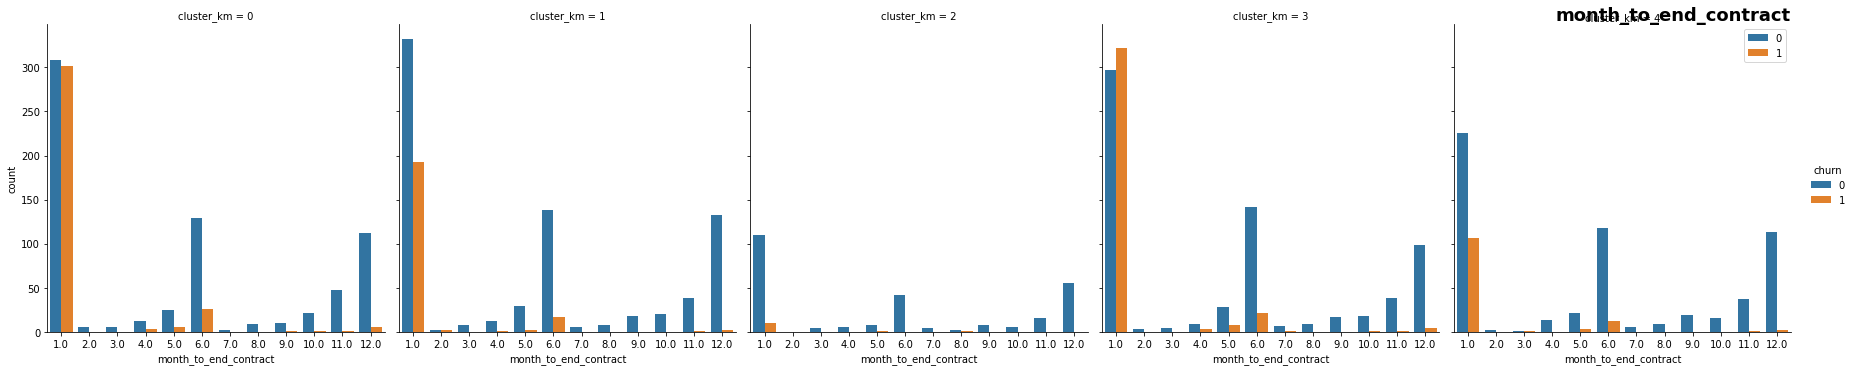

In [72]:
# построим графики распределения для категориальных данных
for colum_name in gym_churn_category_clust.columns:
    
    sns.catplot(x=colum_name,
            col="cluster_km",
            col_wrap=5,
            hue='churn',
            kind='count',
            data=gym_client,palette='tab10');
    plt.title(label=colum_name, loc='right', fontsize=18, fontweight='bold', pad=1)
    plt.legend()
    plt.show()   


In [73]:
# создадим таблицу с количественными признаками, гистограммы которых нужно получить
# оставим в таблице колонки с категориальными значениями
gym_churn_number_clust=gym_client[['avg_additional_charges_total','lifetime','avg_class_frequency_total' ,'avg_class_frequency_total','avg_class_frequency_current_month']]
gym_churn_number_clust.head()

,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_total,avg_class_frequency_current_month
0,14.227470,3,0.020398,0.020398,0.000000
1,113.202938,7,1.922936,1.922936,1.910244
2,129.448479,2,1.859098,1.859098,1.736502
3,62.669863,2,3.205633,3.205633,3.357215
4,198.362265,3,1.113884,1.113884,1.120078


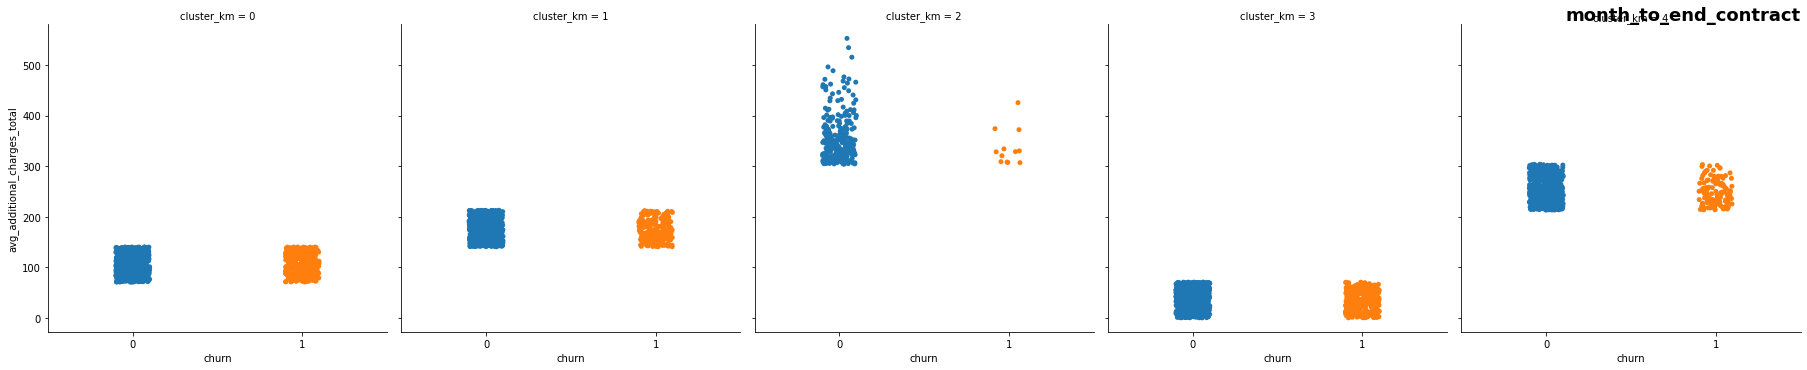

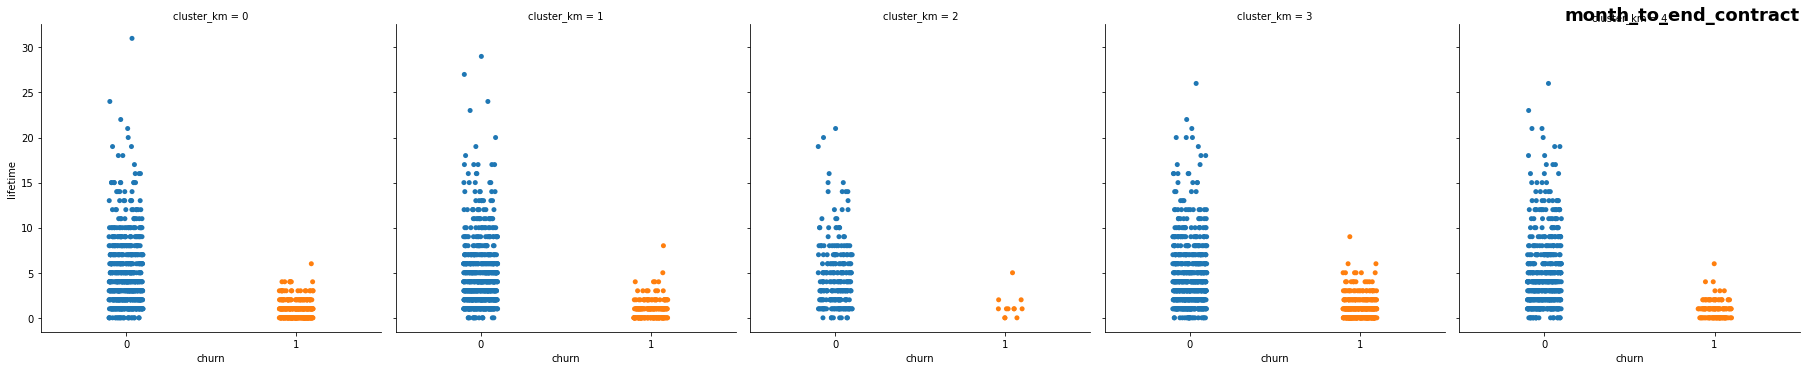

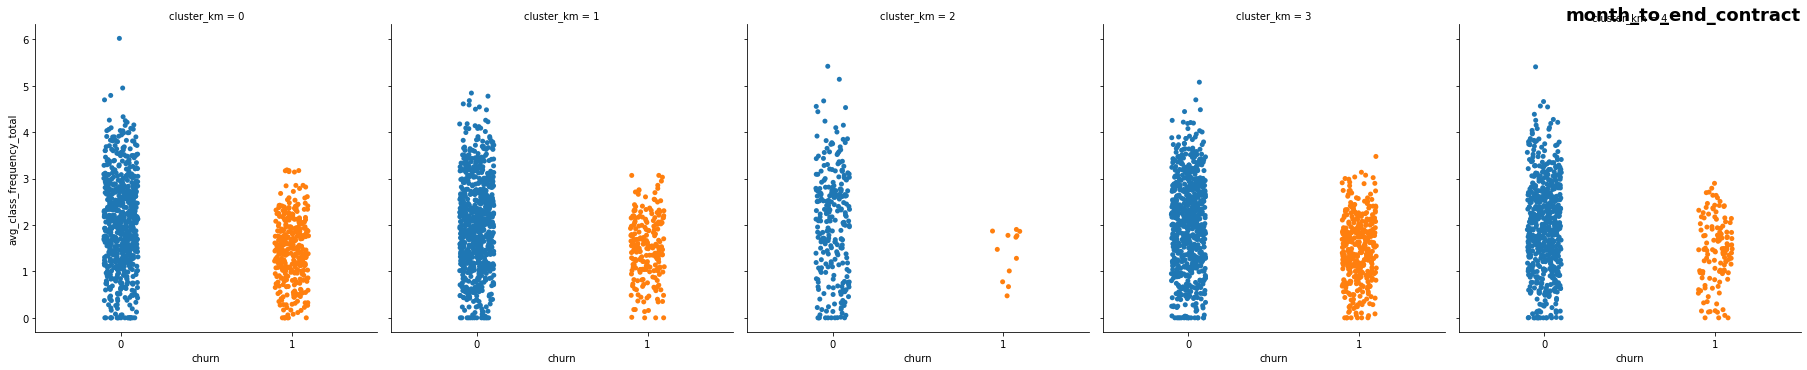

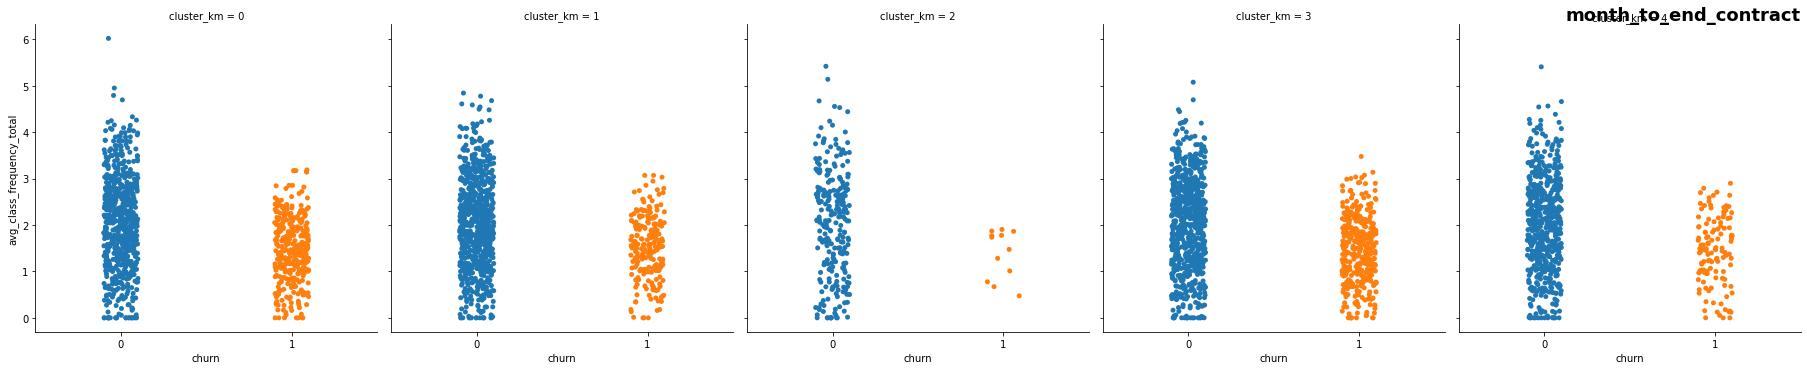

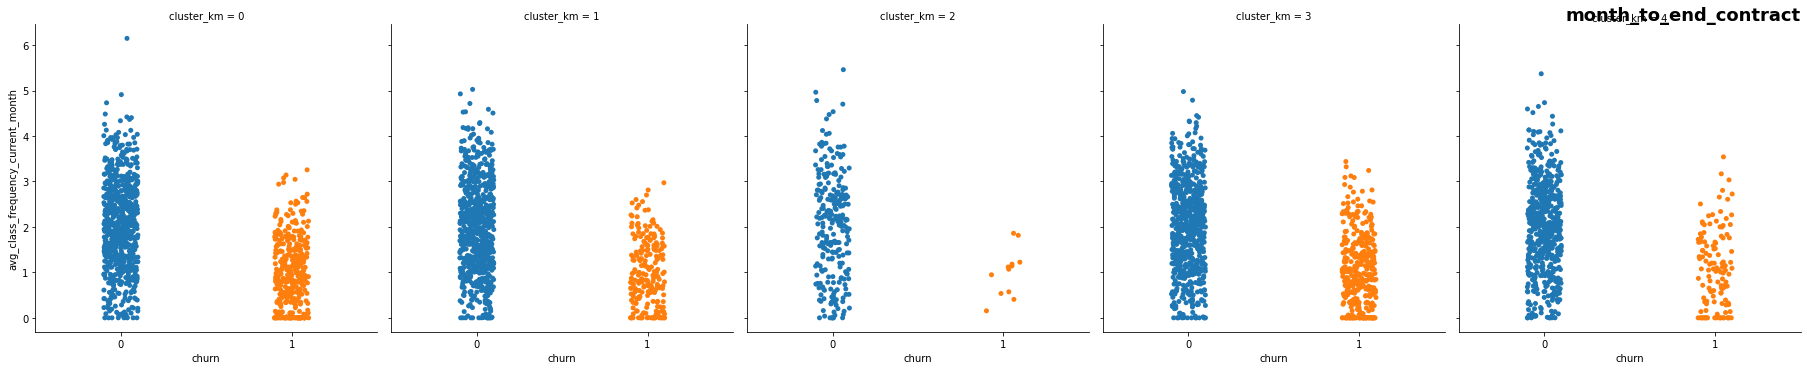

In [74]:
# построим графики распределения для количественных данных
for column_name in gym_churn_number_clust.columns:
    
    sns.catplot(x='churn',
            y=column_name,
            col="cluster_km",
            data=gym_client);
    plt.title(label=colum_name, loc='right', fontsize=18, fontweight='bold', pad=1)
    #plt.legend()
    plt.show() 

Из гистограмм распределения признаков по кластерам можно отметить, в каком именно кластере происходит наибольший оток клиентов.

### Подсчёт доли оттока для кластеров.

Для каждого полученного кластера посчитаем долю оттока (методом groupby()). 

In [75]:
churn_share=gym_client.query('churn==1').groupby('cluster_km')['churn'].count()/gym_client.groupby('cluster_km')['churn'].count()
churn_share

cluster_km
0    0.334305
1    0.226611
2    0.044280
3    0.349806
4    0.178470
Name: churn, dtype: float64

Вывод: наибольшая доля оттока наблюдается в 1 и 3 кластере, используя гистограммы распределения и таблицу статистики по средним значениям признаков по кластеру сформулируем выводы и рекомендации.

## Выводы

### Основные выводы

На основе полученного разбиения на кластеры и таблицы средних значений признаков сформируем "портрет" клиента , которыё покинет клуб с меньшей вероятностью:

- мужчина или женщина зрелого возраста;
- вероятно проживающий или работающий в непосредственной близости от клуба;
- сотрудник компании-партнёра фитнес-клуба;
- вероятно имеющий возможность связи с клубом по телефону;
- имеющий абонемент на длительный срок;
- вероятно посещающий групповые занятия;
- тратящий средства на дополнительные услуги фитнес-клуба;
- имеющий длительный срок до окончания абонемента;
- являющийся давним клиентом клуба;
- посещающий клуб в среднем 2 раза в неделю.

### Рекомендации для работы с клиентами.

Для уменьшения оттока клиентов рекоменуется действовать по двум направлениям: 

1) стремиться приблизить как можно большее число клиентов к характеристикам "идеального" клиента (п.5.1);
 - при оформлении любого абонемента предлагать оставить хотя бы один контактный номер телефона, для уведомления об акциях клуба;
 - выбрать лояльную ценовую политику для продажи абонементов на длительный срок (акции, рассрочка);
 - предлагать первое посещение любого группового занятия в подарок, возможно предлагать запись на групповые занятия сразу в день покупки абонемента;
 - использовать в клубе удобную систему оплаты дополнительных услуг клуба, например внесение средств на депонент в начале месяца, возможность оплаты услуг на рецепции;
 - для непрерывности абонемента предлагать лояльную ценовую политику для клиентов, продлевающих свой абонемент (скидки, месяц в подарок);
 - вести учёт посещений клуба и поощерять клиентов пропорционально частоте и давности посещений.

2) Приглашать новых клиентов , ориентируясь на имеющиеся характеристики "идеального" клиента:

 - при проведении акций по привлечению новых клиентов распространять рекламу (листовки, объявления) в непосредственной близости от клуба;
 - привлекать новых клиентов , работающих в компаниях-партнерах.